# Pymaceuticals Inc.
---

### Analysis
1. Tumor Volume vs. Time Point for a Single Mouse Treated with Capomulin:
The line plot shows the tumor volume over time for a single mouse treated with Capomulin.
Tumor volume generally decreases over time, indicating a potential response to treatment.
This visualization demonstrates the effectiveness of Capomulin in reducing tumor volume over the treatment period for this specific mouse.

2. Distribution of Tumor Volume for Each Treatment Group:
The box plot displays the distribution of final tumor volume for each treatment group (Capomulin, Ramicane, Infubinol, and Ceftamin).
Capomulin and Ramicane exhibit lower median tumor volumes compared to Infubinol and Ceftamin.
Capomulin and Ramicane also have narrower interquartile ranges, indicating less variability in tumor volume compared to Infubinol and Ceftamin.
Infubinol has a potential outlier with a final tumor volume below 36 mm3.

3. Scatter Plot of Mouse Weight vs. Average Tumor Volume for Capomulin Regimen:
The scatter plot illustrates the relationship between mouse weight and average tumor volume for mice treated with Capomulin.
There is a positive correlation between mouse weight and average tumor volume, indicating that heavier mice tend to have larger tumor volumes.
The linear regression line highlights this positive relationship, showing an increasing trend in tumor volume with increasing mouse weight.

4. Pie Chart Showing Distribution of Female vs. Male Mice:
The pie chart presents the distribution of female and male mice in the dataset.
The majority of the mice are male, comprising approximately 51% of the population, while females make up the remaining 49%.
This distribution provides insight into the gender balance within the experimental dataset.
Overall, these visualizations offer valuable insights into the tumor response to different treatments, the relationship between mouse weight and tumor volume, and the gender distribution of mice in the study.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left" )

# Display the data table for preview
combined_data.head(12)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [22]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
duplicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'g989'
clean_data = combined_data.drop(combined_data[combined_data['Mouse ID'] == duplicate_mouse_id].index)

# Print the updated DataFrame
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [26]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_data["Mouse ID"].nunique()
num_mice

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


regimen = clean_data.groupby('Drug Regimen')

mean_tumor_vol = regimen['Tumor Volume (mm3)'].mean()
median_tumor_vol = regimen['Tumor Volume (mm3)'].median()
variance_tumor_vol = regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_vol = regimen['Tumor Volume (mm3)'].std()
sem_tumor_vol = regimen['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume":median_tumor_vol,
    "Tumor Volume Variance":variance_tumor_vol,
    "Tumor Volume Std. Dev":std_dev_tumor_vol,
    "Tumor Volume SEM":sem_tumor_vol    
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
advanced_stats.columns = ['Mean', 'Median', 'Var', 'Std', 'SEM']
advanced_stats   

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

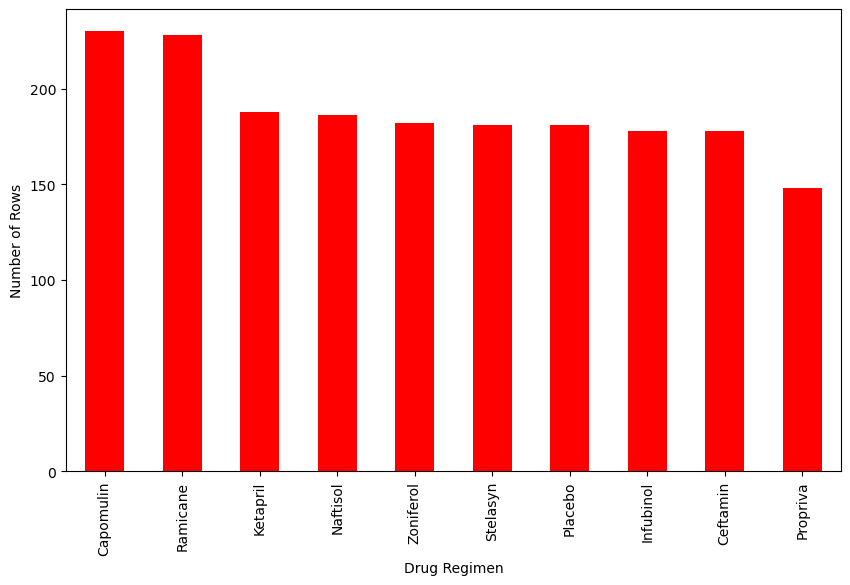

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = clean_data['Drug Regimen'].value_counts()

#adding bar chart and color 
rows_per_regimen.plot(kind='bar', figsize=(10, 6), color= 'red')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

plt.show()

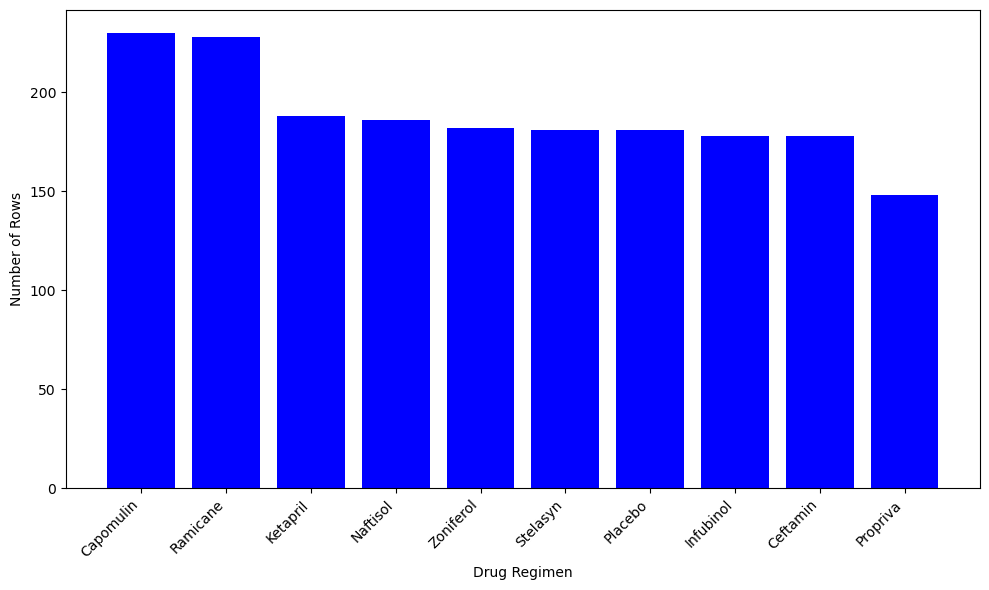

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the total number of rows for each drug regimen
rows_per_regimen = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(rows_per_regimen.index, rows_per_regimen, color='blue')

# Add title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


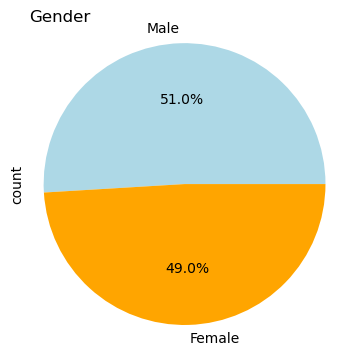

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data['Sex'].value_counts()

# Create the pie plot using Pandas
gender_distribution.plot.pie(autopct='%1.1f%%', figsize=(4, 4), colors=['lightblue', 'orange'])

plt.title('Gender', loc='left')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


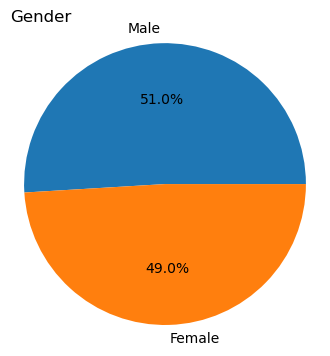

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the count of male and female mice
gender_distribution = clean_data['Sex'].value_counts()

# Create labels and sizes for the pie plot
labels = gender_distribution.index
sizes = gender_distribution.values

# Define colors for each gender
#colors = ['lightblue', 'lightcoral']

# Create the pie plot
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Gender', loc='left')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse
filtered_data = clean_data[clean_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,NaN,NaN,NaN,NaN,NaN,NaN
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
243,z435,10,NaN,NaN,NaN,NaN,NaN,NaN
244,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
245,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
246,z795,45,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


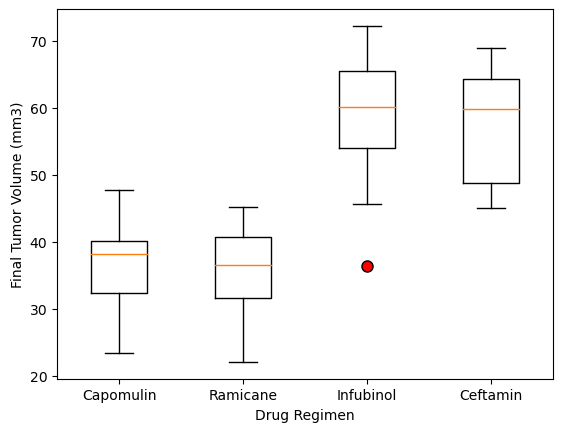

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Generate a box plot
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show plot
plt.show()



## Line and Scatter Plots

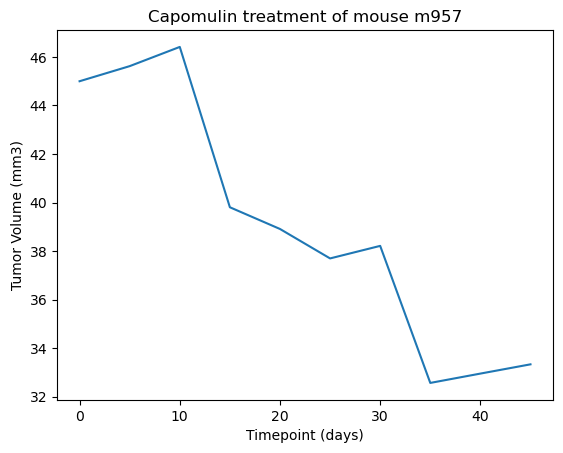

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'm957'
capomulin_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel('Timepoint (days)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()

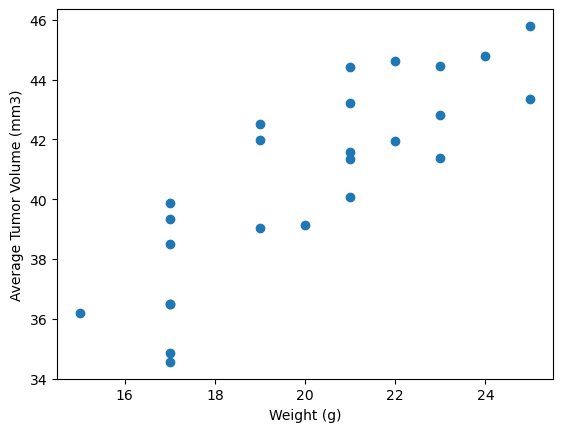

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate average tumor volume and weight
grouped_capomulin = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean'})
merged_weight = pd.merge(grouped_capomulin, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Generate the scatter plot
plt.scatter(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])

# Add labels and title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient is 0.84


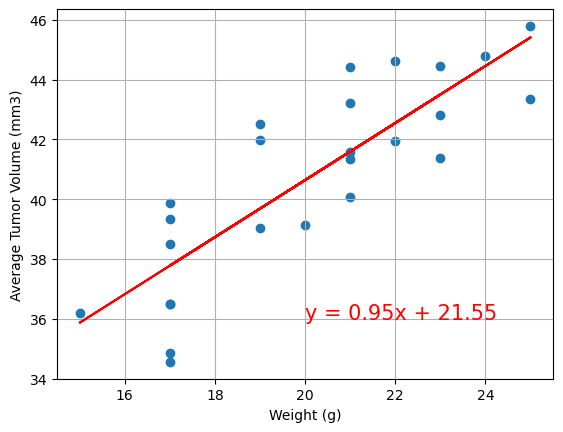

In [18]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])
print(f"The correlation coefficient is {correlation[0]:.2f}")

# Perform linear regression
slope, intercept, _, _, _ = st.linregress(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])

# Create equation of the line to calculate predicted tumor volume
regress_values = merged_weight['Weight (g)'] * slope + intercept

# Plot scatter plot and linear regression model
plt.scatter(merged_weight['Weight (g)'], merged_weight['Tumor Volume (mm3)'])
plt.plot(merged_weight['Weight (g)'], regress_values, "r-")

# Annotate linear regression equation
plt.text(20, 36, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=15, color="red")

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()